# Загрузка данных по маммографии

Один из общедоступных наборов данных в архиве Центра машинного обучения [описание](https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass).

Собран в Институте Радиологии университета Эрланген-Нюрнберг, Erlangen, Germany в период между 2003 и 2006 гг.

Маммография является наиболее эффективным методом скрининга рака молочной железы, доступных сегодня.
Однако низкая положительная прогностическая ценность биопсии молочной железы в результате интерпретации маммографии приводит к примерно 70% ненужных биопсий с доброкачественными результатами.
Для снижения количества ненужных биопсий молочных желез предлагаются системы автоматизированной диагностики, которые помогают врачу решить или делать биопсию подозрительного участка, или можно пока отложить проверку и понаблюдать.


Колонки:

1. Оценка BI-RADS в диапазоне от 1 (определенно доброкачественная)
   до 5 (очень подозрительно злокачественная), полученная в процессе двойного осмотра врачами. (порядковый)
2. Возраст пациента в годах
3. Форма образования: round=1 oval=2 lobular=3 irregular=4 
4. Край образования: очерченный = 1 мелкодольчатый = 2 расплывчатый = 3 плохо определенный = 4 пальчатый = 5
5. Плотность образования: высокая = 1 изо = 2 низкая = 3 жиросодержащая = 4 (порядковый)
6. Реальная тяжесть: доброкачественная = 0 или злокачественная = 1 (биноминальный)


Первоисточник

M. Elter, R. Schulz-Wendtland and T. Wittenberg (2007)
    The prediction of breast cancer biopsy outcomes using two CAD approaches that both emphasize an intelligible decision process.
    Medical Physics 34(11), pp. 4164-4172



In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data
kk = 'est age forma krai dens itog'.split()
D = pd.read_csv('mammographic_masses.data', names=kk, header=None, na_values='?')
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
est      959 non-null float64
age      956 non-null float64
forma    930 non-null float64
krai     913 non-null float64
dens     885 non-null float64
itog     961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [3]:
D

,est,age,forma,krai,dens,itog
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


Посмотрим распределение всех четырех предсказывающих показателей.

При этом настроим палитру, чтобы плохой исход был пугающе красным, а хороший - успокаивающе зеленым.

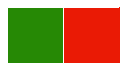

In [4]:
pal = sns.choose_diverging_palette()

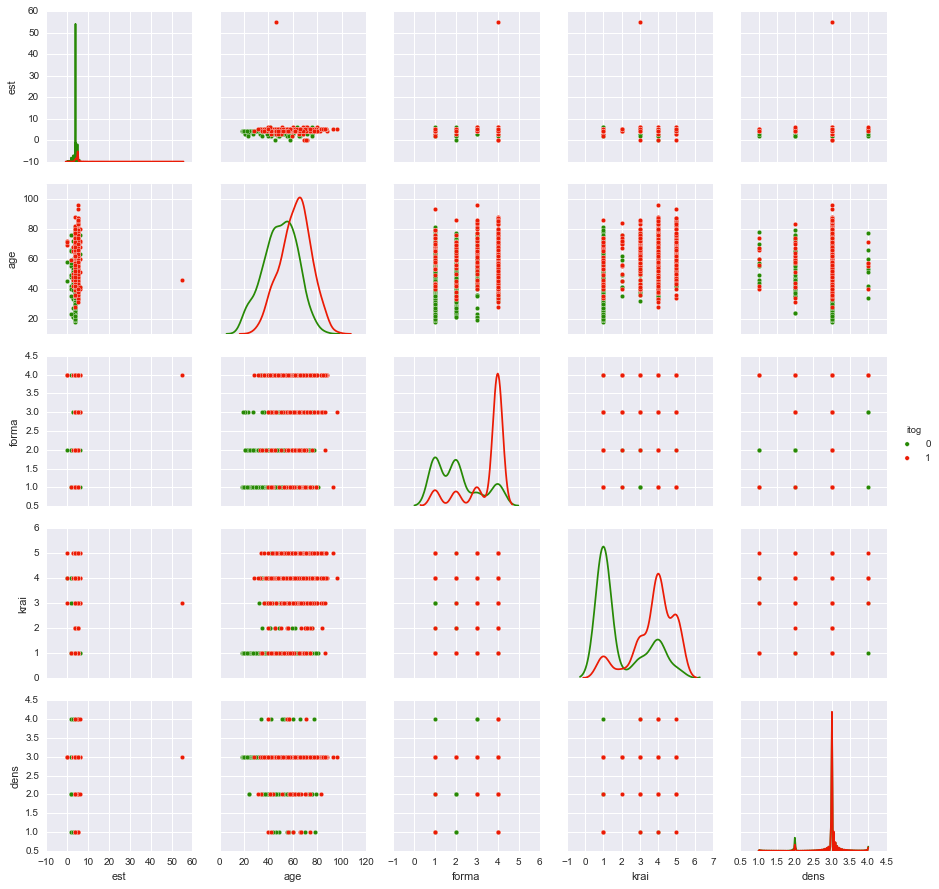

In [5]:
sns.pairplot(data=D, x_vars=D.columns[:-1], y_vars=D.columns[:-1], dropna=False,
    hue="itog", 
    diag_kind="kde", 
    palette=pal);

Авторами заявлено, что оценка врачей `est` варьирует от 1 до 5. Одно значение 55. Это явно опечатка.

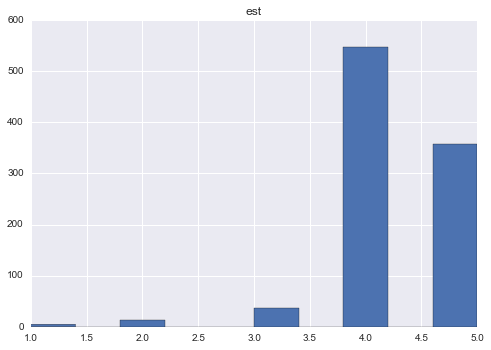

In [6]:
D.ix[D.est>5,'est']=5
D.ix[D.est<1,'est']=1
D.hist('est');

### &copy;

https://www.flickr.com/photos/richierocket/8549776040

http://www.bowerbird.org.au/observations/27111